In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

****Partie 1  Analyse de données****

***1. Importez les données du fichier CSV dans un DataFrame***

In [2]:
data = pd.read_csv('datasets/housing.csv')
print(data.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [3]:
# shape of dataset
print(data.shape)

(21613, 22)


In [4]:
# dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

*On peut observer qu'il y a des valeurs manquantes pour le nombre des chambres à coucher (bedrooms) et le nombre des salles de bains (bathrooms)
on va traiter ceci*

***2- statistiques :  les statistiques descriptives de base (moyenne, médiane, quartiles, etc.)
pour les colonnes surface, nombre_de_chambres et prix***

In [5]:
print(data[['sqft_living','bedrooms','price']].describe())

        sqft_living      bedrooms         price
count  21613.000000  21600.000000  2.161300e+04
mean    2079.899736      3.372870  5.400881e+05
std      918.440897      0.926657  3.671272e+05
min      290.000000      1.000000  7.500000e+04
25%     1427.000000      3.000000  3.219500e+05
50%     1910.000000      3.000000  4.500000e+05
75%     2550.000000      4.000000  6.450000e+05
max    13540.000000     33.000000  7.700000e+06


***3- Identifiez et traitez les valeurs manquantes et/ou aberrantes dans les données.***

*On peut remplaces les valeurs manquantes de bedrooms et nombre de bathrooms avec la moyenne de la colonne*

In [6]:
bedrooms_mean = data['bedrooms'].mean()
bathrooms_mean = data['bathrooms'].mean()
print(bedrooms_mean,bathrooms_mean)
data['bedrooms'].replace(np.nan,bedrooms_mean, inplace=True)
data['bathrooms'].replace(np.nan,bathrooms_mean, inplace=True)

3.37287037037037 2.1157362403369904


***4- Créez un graphique montrant l'évolution du prix moyen des transactions immobilières en fonction du temps.***

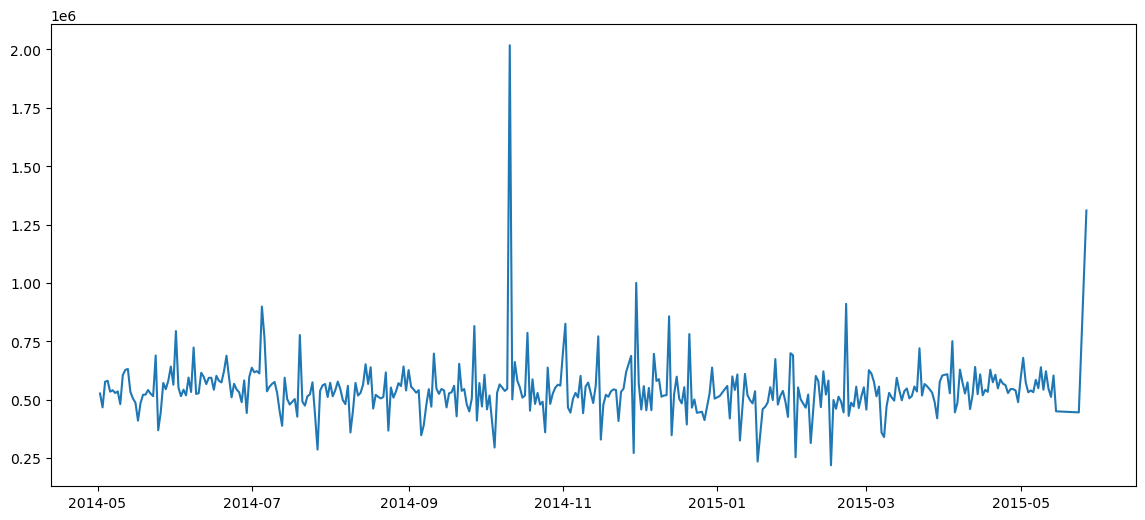

In [8]:
data['date'] = pd.to_datetime(data['date'])
df = data.groupby('date')['price'].mean().reset_index()
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['price'])
plt.show()

***Partie 2 : Apprentissage automatique***

***1. Préparez les données pour l'apprentissage automatique***

In [41]:
# target
y = data["price"].to_numpy()
# features
x = data[['bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors']].to_numpy()
print(y.shape,x.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
# see the range of values of each feature
for i in range(x_train.shape[1]):
    print(x_train[:,i].max(),x_train[:,i].min())
# normalisation
means_train = np.mean(x_train, axis=0)
stds_train = np.std(x_train, axis=0)
means_test = np.mean(x_test, axis=0)
stds_test = np.std(x_test, axis=0)
x_train = (x_train - means_train) / stds_train
x_test = (x_test - means_test) / stds_test

(21613,) (21613, 5)
33.0 1.0
8.0 0.5
13540.0 370.0
1651359.0 520.0
3.5 1.0


***2- Sélectionnez un algorithme d'apprentissage automatique adapté à la tâche***

*Avec des données strcturées on va utliser des algorithmes classsique de machine learning: Linear regression, Random forest, support vector machine*

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
model__linear_reg = LinearRegression()
model__linear_reg.fit(x_train, y_train)
y_train_pred = model__linear_reg.predict(x_train)
y_test_pred = model__linear_reg.predict(x_test)
print("train score: " ,r2_score(y_train,y_train_pred))
print("test score: " ,r2_score(y_test,y_test_pred))

train score:  0.50939582713768
test score:  0.5008480770683146


*The model does not even fit the train set, we should train more complexe model*

In [152]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=50,max_depth=17,min_samples_split=20,min_samples_leaf=10, max_features=0.7,random_state=42)
model_RFR.fit(x_train, y_train)
y_train_pred = model_RFR.predict(x_train)
y_test_pred = model_RFR.predict(x_test)
print("train score: " ,r2_score(y_train,y_train_pred))
print("test score: " ,r2_score(y_test,y_test_pred))

train score:  0.6698811124912213
test score:  0.5588960177240178


*The model fits the training set very well, but it fits the test set bad, we have overfitting problem, let's try polynomial regression with regulirazation*

In [137]:
# Polynomial regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

degree = 4
alpha = 19
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("train score: " ,r2_score(y_train,y_train_pred))
print("test score: " ,r2_score(y_test,y_test_pred))

train score:  0.5903097614241029
test score:  0.5770060379122878


*On a changer les valeurs des hyperparams jusqu'à obtenir les bons, le meilleur resultat est de polynomial regression score :58 % en test set*

*on peut faire mieux si on obtient plus de data*